## Beginning to visualise data

Generally, if you are using the python for the first time, good to spend some time on basics of python before diving into the data viz tasks, otherwise, if you are experienced enough you can start looking at these examples below to reproduce and adapt for your cases

As a key strategy, whenever you feel struggling and stucked to some errors or so, please let us know using our meetings, drop-in sessions or Teams channel. You can work with your group members as well while working on these python scripts in general; 

`"Learning is the new skill. Imagination, creation and asking new questions are at its core" (proverb)`.

## Start with some basics 

Data visualization is displaying quantitative and qualitative information so that a viewer can see patterns, trends, oddities, correlations, constancy, and variation, in ways that other forms (text and table) may not allow. Plotting parts of data can be an important step in descriptive and exploratory analyses. 

Here we first introduce two main plotting libraries in Python: matplotlib and seaborn. And then, looking at basics of Plotnine and Altair

`"The simple graph has brought more information to the data analyst’s mind than any other device." (John Tukey)`

### matplotlib library

Matplotlib is a visualization library/module/package in Python for 2D plots. It allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib can produce several plots like line, bar, scatter, histogram etc.

- The default plot in matplotlib is a line plot made by the function plot.

- Some other types of plots in matplolib are plt.scatter, plt.bar, plt.hist, plt.pie that fit different types of data.

- It is not difficult to make more complicated plots with matplotlib. However, seaborn serves for more engaging and better structured outputs while creating the data visualizations



In [2]:
# import matplotlib
import matplotlib.pyplot as plt

# import other packages we may need
import pandas as pd
import numpy as np

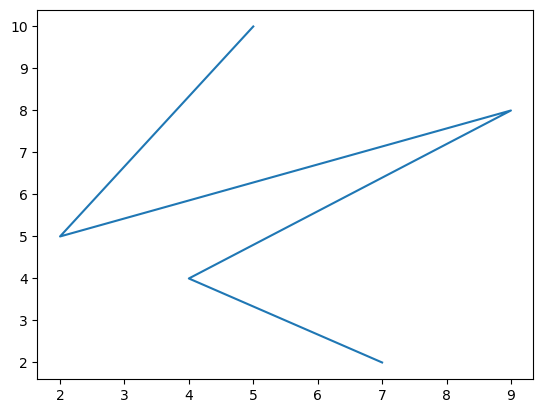

In [3]:
# X-axis values
x = [5, 2, 9, 4, 7]

# Y-axis values
y = [10, 5, 8, 4, 2]

# The default plot in matplotlib is a line plot made by the function plot
plt.plot(x, y)

# add labels and title to the plot
#plt.xlabel("X-axis data")
#plt.ylabel("Y-axis data")
#plt.title('plot of X vs Y')

# function to show the plot
plt.show()

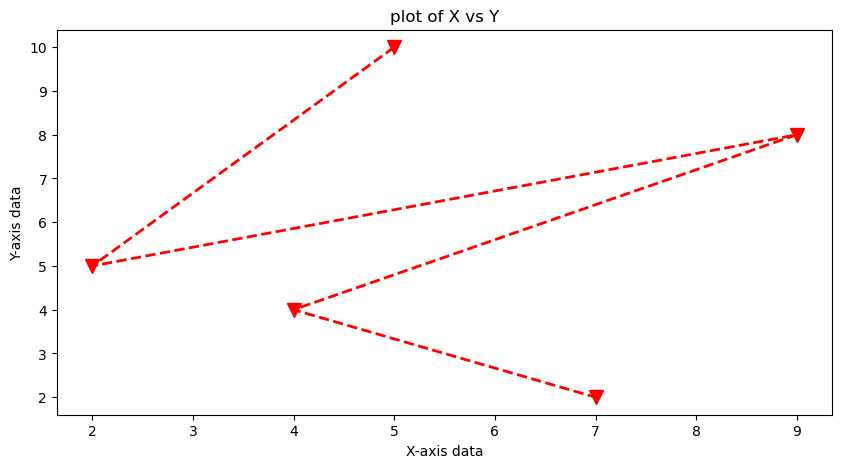

In [4]:
# Make several adjustments to how the plot is displayed

# change the size of the figure- has to be called before the plot function
plt.figure(figsize=(10,5))

# function to plot
plt.plot(x, y, marker='v', markersize= 10, color='r', linestyle='--', linewidth = 2)

# add labels and title to the plot
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('plot of X vs Y')

# function to show the plot
plt.show()

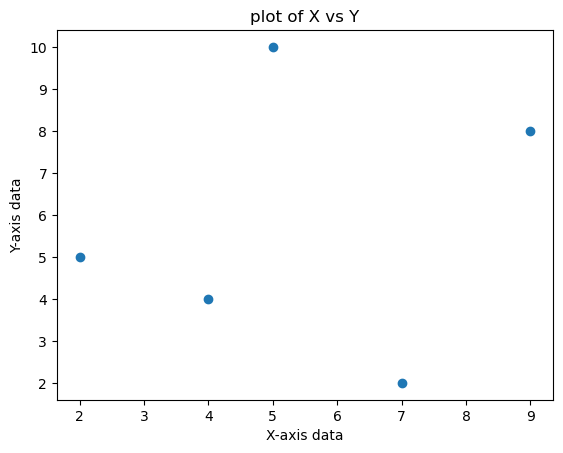

In [5]:
# function to plot- also change it to plt.bar(x, y) to make a bar plot
plt.scatter(x, y)

# add labels and title to the plot
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('plot of X vs Y')

# function to show the plot
plt.show()

**Try followings and reflect on**

- try to change the default settings of these parameters into a valid alternative option; `c=None, marker=None`
- How about adding the the input parameter `alpha=0.5` ? 

### Seaborn library

Seaborn is a library/module/package for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn has a nice structure which makes plotting easier using three types of relplot, displot, and catplot (“relational”, “distributional”, and “categorical” plots).

The general command is:

`sns.---plot(data=---, x="---", kind="---")`

and you can add appropriate optional elements to it:

`sns.---plot(data=---, x="---", y="---", kind="--", hue="---", multiple="---", col/row="---", style="---", size="---", ...)`

Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this

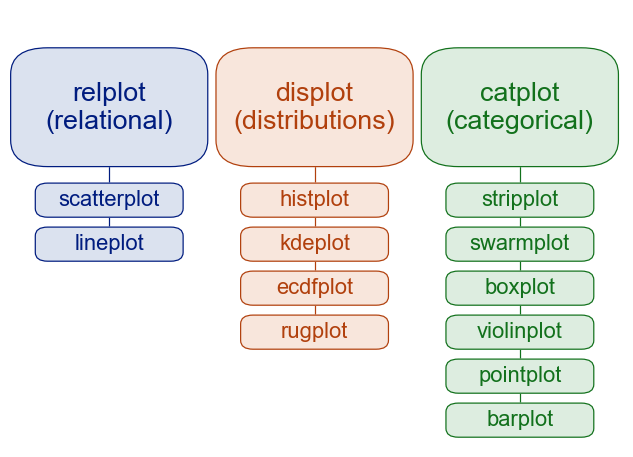

Below you will see some examples to explore by using the `fishimportdata` file to illustrate some functionalities. Try to decode the written codes, how they work and what is the created output while working out. 


In [39]:
# import seaborn
import seaborn as sns

# Importing the fish data set 
fish = pd.read_excel('fishimportdata.xlsx')
print(fish.head())

# Melt the DataFrame to long-form for Seaborn usage
fish_long = fish.melt(id_vars=["Product"], var_name="Year", value_name="ImportVolume")
print(fish_long.head())

                   Product        2014        2015        2016        2017  \
0  Trout, fresh and frozen   95011.936  104791.429  120977.955  135236.725   
1   Atlantic salmon, fresh  568901.674  658831.066  842603.917  948877.175   
2   Pacific salmon, fresh   111540.545   69978.873   80010.180   70733.165   
3  Atlantic salmon, frozen   21457.836   16356.453   24230.787   22492.341   
4  Pacific salmon, frozen   224334.704  238962.677  246204.469  302340.719   

          2018  
0   164695.746  
1  1035924.073  
2    90324.372  
3    20197.169  
4   360673.107  
                   Product  Year  ImportVolume
0  Trout, fresh and frozen  2014     95011.936
1   Atlantic salmon, fresh  2014    568901.674
2   Pacific salmon, fresh   2014    111540.545
3  Atlantic salmon, frozen  2014     21457.836
4  Pacific salmon, frozen   2014    224334.704


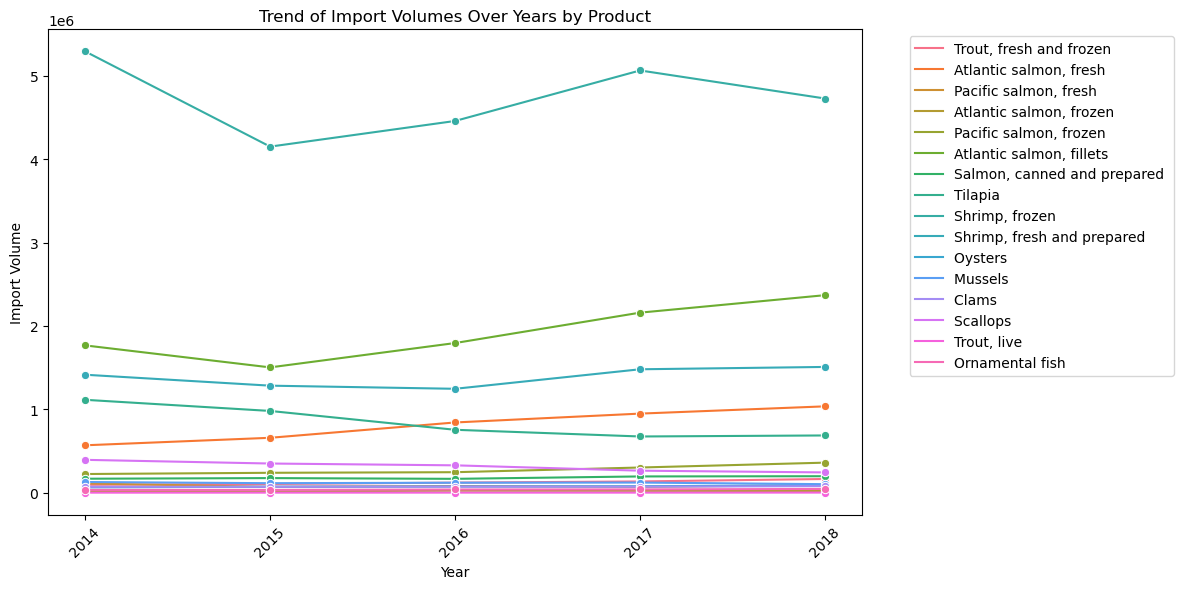

In [42]:
# Lineplot for Import Trends - Trend of Imports Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=fish_long, x="Year", y="ImportVolume", hue="Product", marker="o")
#sns.relplot(data=fish_long, x="Year", y="ImportVolume", kind = "line", hue="Product", marker="o")
plt.title("Trend of Import Volumes Over Years by Product")
plt.ylabel("Import Volume")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Try followings and reflect on**

- what did you get if you just use the `sns.lineplot(data=fish_long, x="Year", y="ImportVolume")` in the above code ? 
- Explain the purpose of `plt.title`, `plt.ylabel` and `plt.xlabel`. What happens if you remove them ? 
- In this block, change the value to make a different view `plt.xticks(rotation=45)` such as `rotation = 90`. 

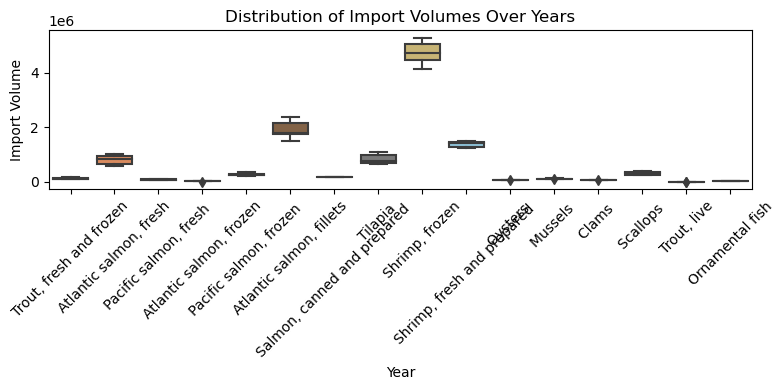

In [9]:
# Boxplot for Import Distribution - Distribution of Import Volumes
plt.figure(figsize=(8, 4))
sns.boxplot(data=fish_long, x="Product", y="ImportVolume", palette="muted")
plt.title("Distribution of Import Volumes Over Years")
plt.ylabel("Import Volume")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Try followings and reflect on**

- what happens if you drop `palette="muted"` ? 
- Is it possible to get the horizontally presented boxplots instead of the vertically created one ? How do you create the horizontal version ? 
- How do you get multiple boxplots which are separated based on the variable `"Product"` ? 

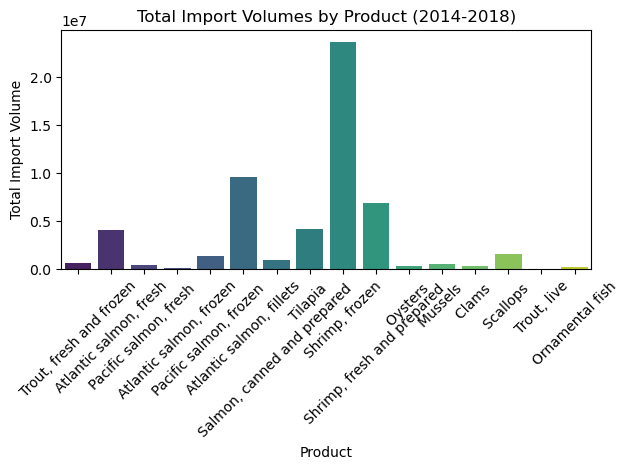

In [8]:
# Barplot for Total Import Volumes - Comparison of Import Volumes Across Products
sns.barplot(data=fish_long, x="Product", y="ImportVolume", estimator=sum, errorbar=None, palette="viridis")
plt.title("Total Import Volumes by Product (2014-2018)")
plt.ylabel("Total Import Volume")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Try followings and reflect on**

- what did you get if you just dropped the input argument `errorbar=None` ?
- Is this part really necessary , `plt.xticks(rotation=45)`, and if so why ? 
- How do you get the ordered barplot instead of the above visualization ? Which steps do you need to follow first ? 

Beyond the above examples, we will see that there are specific ways of writing seaborn codes to create data visualizatin

- **Figure-level vs. axes-level functions**

For the axes-level, you have you are applying the direct type of data viz with the built in seaborn function. To illustrate, the distributions module defines functions that specialize in representing the distribution of datapoints. You can apply the function `sns.histplot` to create your visualization

On the other side, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions, such as `sns.displot` then you can choose one of the suitable options from the list given in image

- **The seaborn.objects interface**

The seaborn.objects namespace was introduced in version 0.12 as a completely new interface for making seaborn plots. It offers a more consistent and flexible API, comprising a collection of composable classes for transforming and plotting data. In contrast to the existing seaborn functions, the new interface aims to support end-to-end plot specification and customization without dropping down to matplotlib (although it will remain possible to do so if necessary).

We will focus more on these options in drop-in session soon!

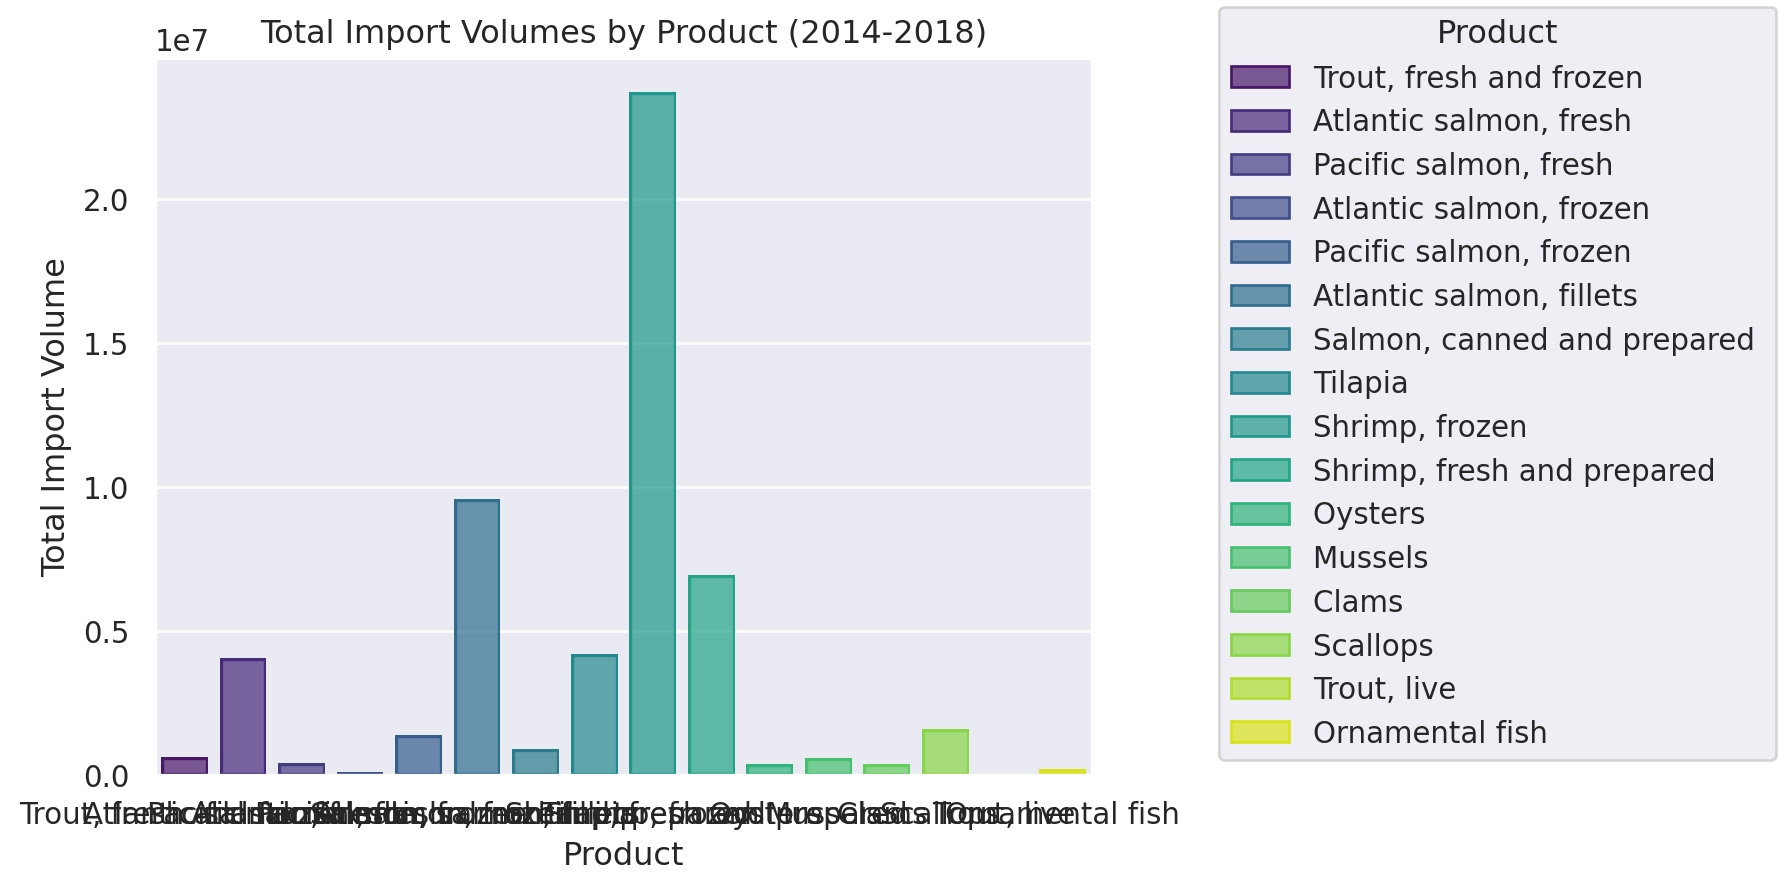

In [44]:
import matplotlib.pyplot as plt                      # Import Matplotlib for figure creation and display
import seaborn.objects as so                          # Import Seaborn's Objects API (so) for declarative plotting

# Seaborn Objects (so) version of the barplot (sum over ImportVolume per Product)
p = (                                                 # Start building a Seaborn Objects plot and assign it to `p`
    so.Plot(                                          # Create a plot specification
        fish_long,                                    # Use `fish_long` as the input DataFrame
        x="Product",                                  # Map the x-axis to the "Product" column
        y="ImportVolume",                              # Map the y-axis to the "ImportVolume" column
        color="Product"                                # Map color to "Product" (helps apply a palette per product)
    )
    .add(                                             # Add a visual mark (geometry) plus a statistical transformation
        so.Bar(),                                      # Use bar marks to draw a bar chart
        so.Agg(func="sum")                             # Aggregate y-values by x using SUM (like estimator=sum)
    )
    .scale(                                           # Define how aesthetics (like color) are scaled
        color="viridis"                                # Use the "viridis" palette for the color scale
    )
    .label(                                           # Set plot title and axis labels
        title="Total Import Volumes by Product (2014-2018)",  # Title text shown above the plot
        x="Product",                                   # Label for the x-axis
        y="Total Import Volume"                        # Label for the y-axis
    )
) 

p

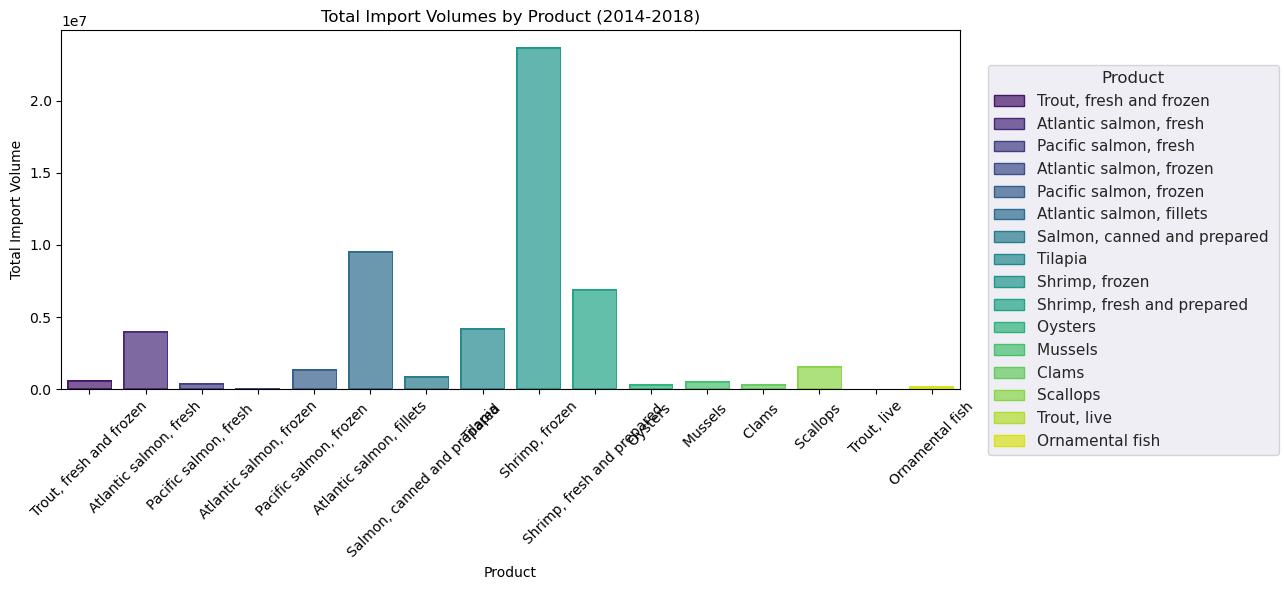

In [47]:
import matplotlib.pyplot as plt                      # Import Matplotlib for figure creation and display
import seaborn.objects as so                          # Import Seaborn's Objects API (so) for declarative plotting

# Seaborn Objects (so) version of the barplot (sum over ImportVolume per Product)
p = (                                                 # Start building a Seaborn Objects plot and assign it to `p`
    so.Plot(                                          # Create a plot specification
        fish_long,                                    # Use `fish_long` as the input DataFrame
        x="Product",                                  # Map the x-axis to the "Product" column
        y="ImportVolume",                              # Map the y-axis to the "ImportVolume" column
        color="Product"                                # Map color to "Product" (helps apply a palette per product)
    )
    .add(                                             # Add a visual mark (geometry) plus a statistical transformation
        so.Bar(),                                      # Use bar marks to draw a bar chart
        so.Agg(func="sum")                             # Aggregate y-values by x using SUM (like estimator=sum)
    )
    .scale(                                           # Define how aesthetics (like color) are scaled
        color="viridis"                                # Use the "viridis" palette for the color scale
    )
    .label(                                           # Set plot title and axis labels
        title="Total Import Volumes by Product (2014-2018)",  # Title text shown above the plot
        x="Product",                                   # Label for the x-axis
        y="Total Import Volume"                        # Label for the y-axis
    )
)                                                    # Finish the plot specification

fig, ax = plt.subplots(figsize=(10, 6))               # Create a Matplotlib figure and axes with the given size
p.on(ax).plot()                                      # Draw the Seaborn Objects plot onto the Matplotlib axes

ax.tick_params(axis="x", rotation=45)                # Rotate x-axis tick labels by 45 degrees for readability
fig.tight_layout()                                   # Adjust spacing to prevent label/title overlap
plt.show()                                           # Render the figure to the screen

### General Guidance

Main purpose of the above plots to show that there are various possibilities in the world of matplotlib or seaborn in general. If you are a novice learner, maybe, before looking at the Altair usage, you can spend more time on the examples from matplotlib or seaborn to sharpen your data viz skills with main libraries. 

- If you're unsure about a specific function or parameter, check the related documentations for detailed explanations and examples.
- Experiment with different plot types and customizations to see how they affect the output.
- Try plotting different datasets (that we shared) to get comfortable with the library.
- Explore additional features like subplots, legends, and annotations to enhance your visualizations.

Note: This is an iterative process so while working on different trials, try to reflect on your experiences and let us know

- Have you tried creating a plot with Matplotlib or seaborn before? If so, what challenges did you face?
- **Feel free to ask if you have any questions or need further assistance as always**

## Plotnine package

**`A grammar of graphics for Python`**

Plotnine is a data visualization package for Python based on the grammar of graphics, a coherent system for describing and building graphs. The syntax is similar to `ggplot2`, a widely successful R package.

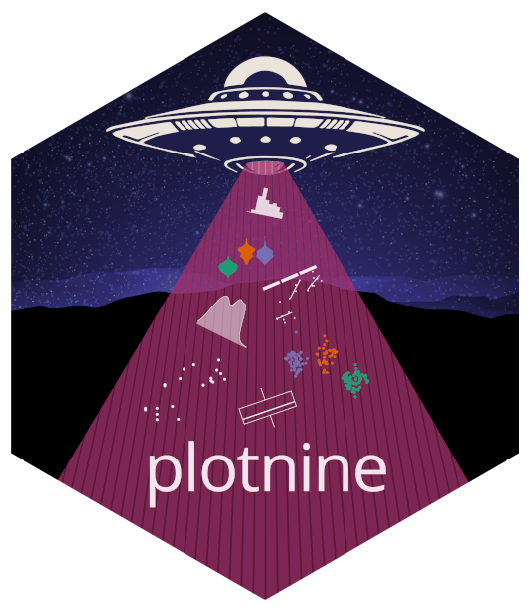

If you have some experiences in ggplot2 of R ecosystem, this can be a good starting point. The idea of the grammer of graphics is transferred into python syntax, but similar function names are used mostly. For each of the visualization related layer, we are able to add them step by step with `+` operator on the same line of code

As a very quick start, you may explore some visualizations on the available data sets in `Plotnine` python package. 

In [12]:
# Install it if you are using for the first time
!pip install plotnine

  Using cached plotnine-0.13.6-py3-none-any.whl (1.3 MB)
  Using cached mizani-0.11.4-py3-none-any.whl (127 kB)


/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


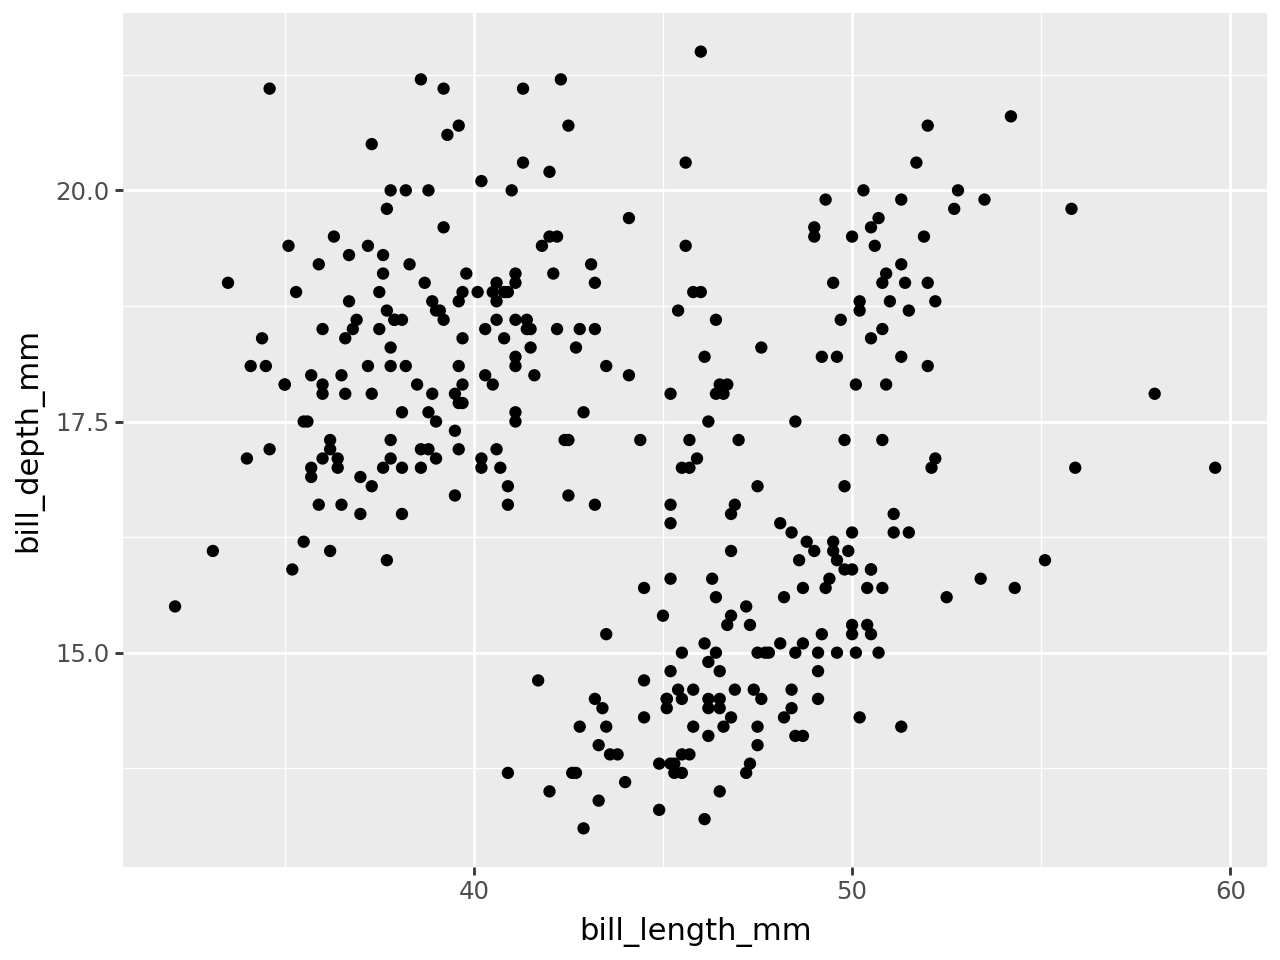

In [13]:
#from plotnine import * 

from plotnine import *
from plotnine.data import penguins

ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm")) + geom_point()

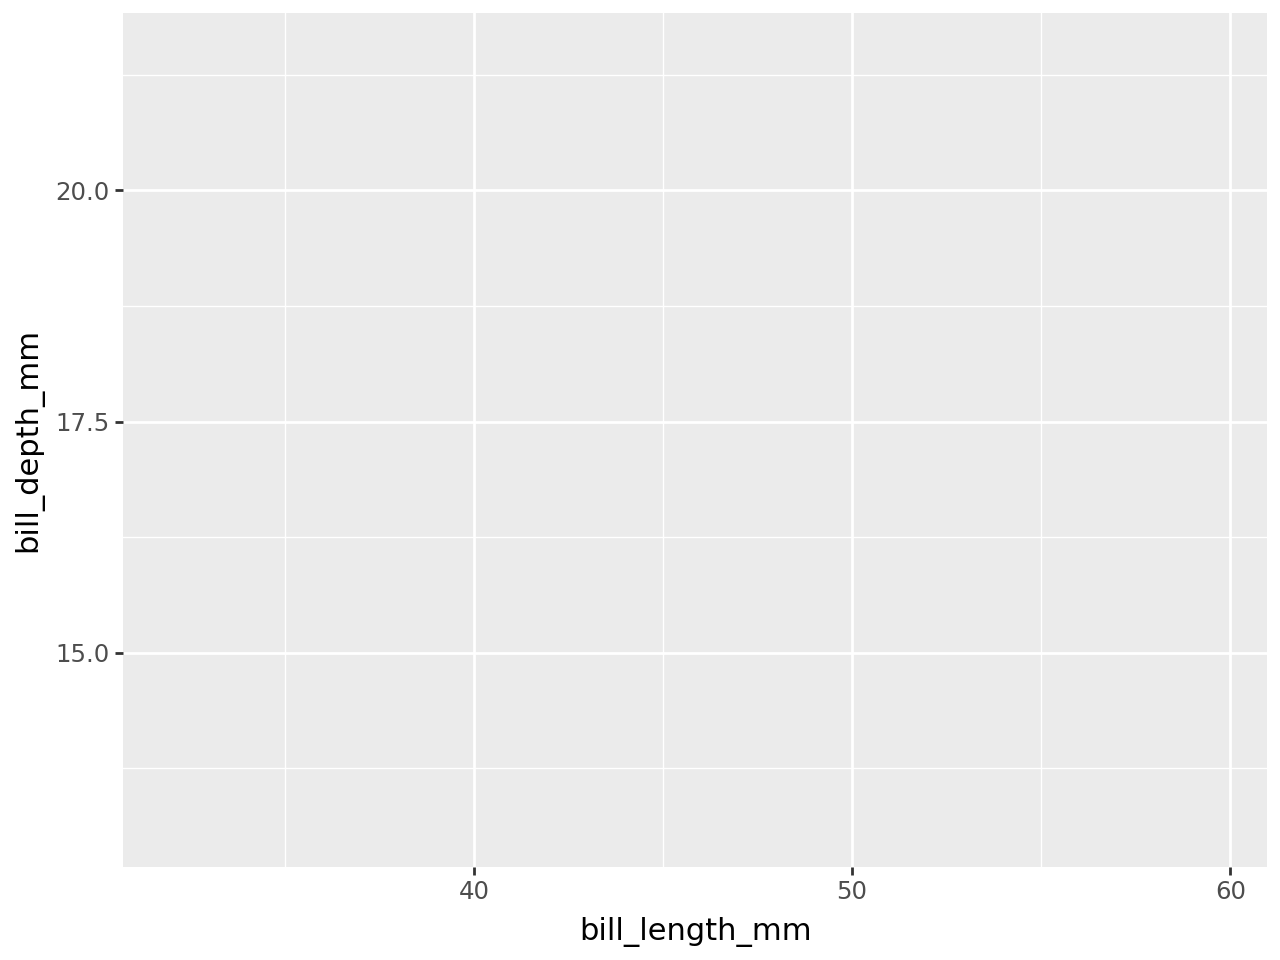

In [48]:
# Alternative way of writing to see the each layer 
(   # Defining the first two layers: data set and necessary mapping 
    ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm")) 
    # Adding the geom type as a kind of mark type  
    # + geom_point() 
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


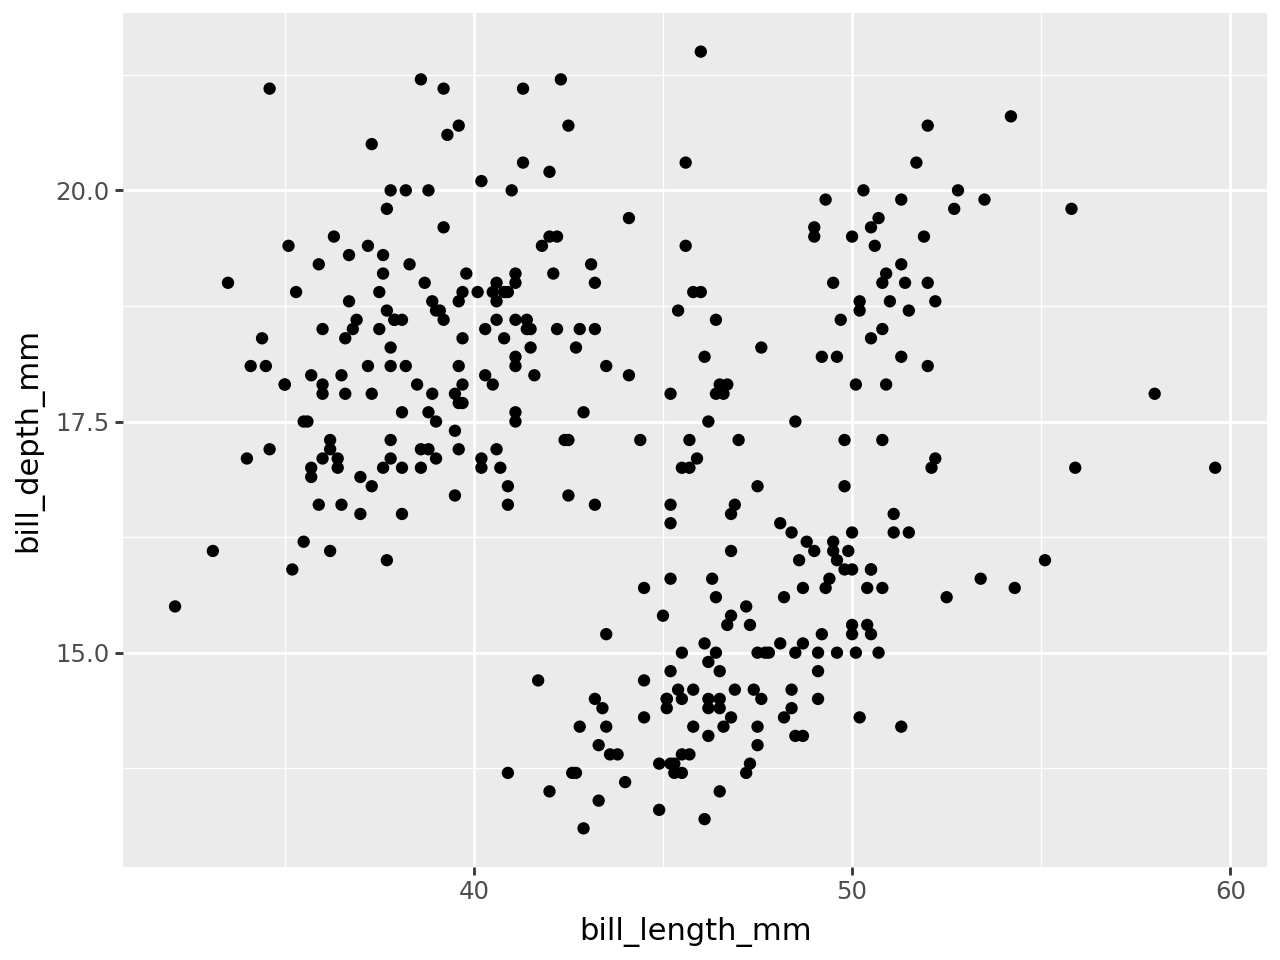

In [49]:
# Alternative way of writing to see the each layer 
(   # Defining the first two layers: data set and necessary mapping 
    ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm")) 
    # Adding the geom type as a kind of mark type  
    + geom_point() 
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


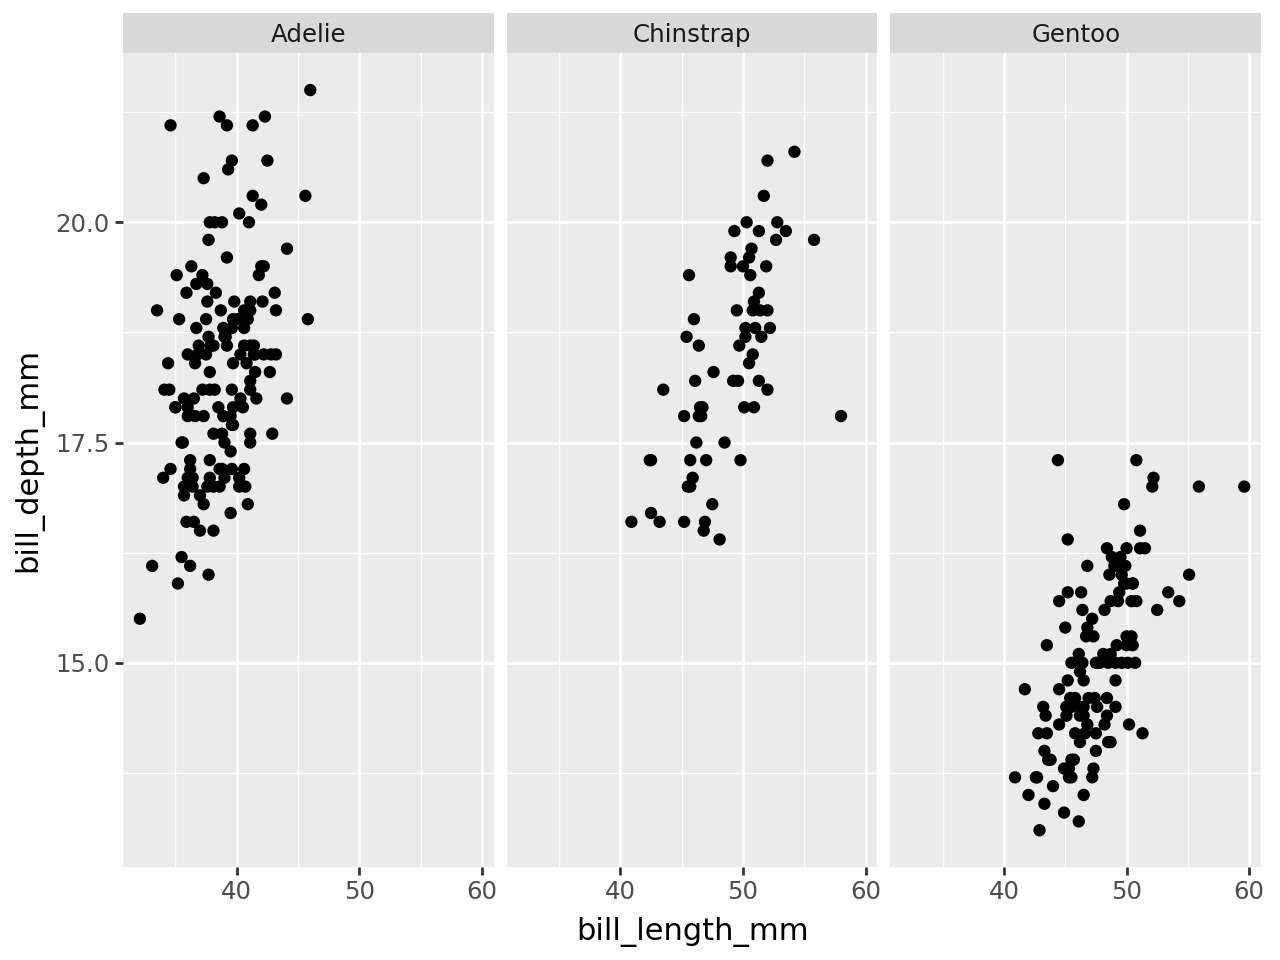

In [15]:
# We can easily create multiple figures over a specific categorical variable to explore some hidden nuances 
# Any data visualization can be repeated across multiple panels without writing a for loop.
(
    ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_point()
    + facet_wrap("species")
)

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


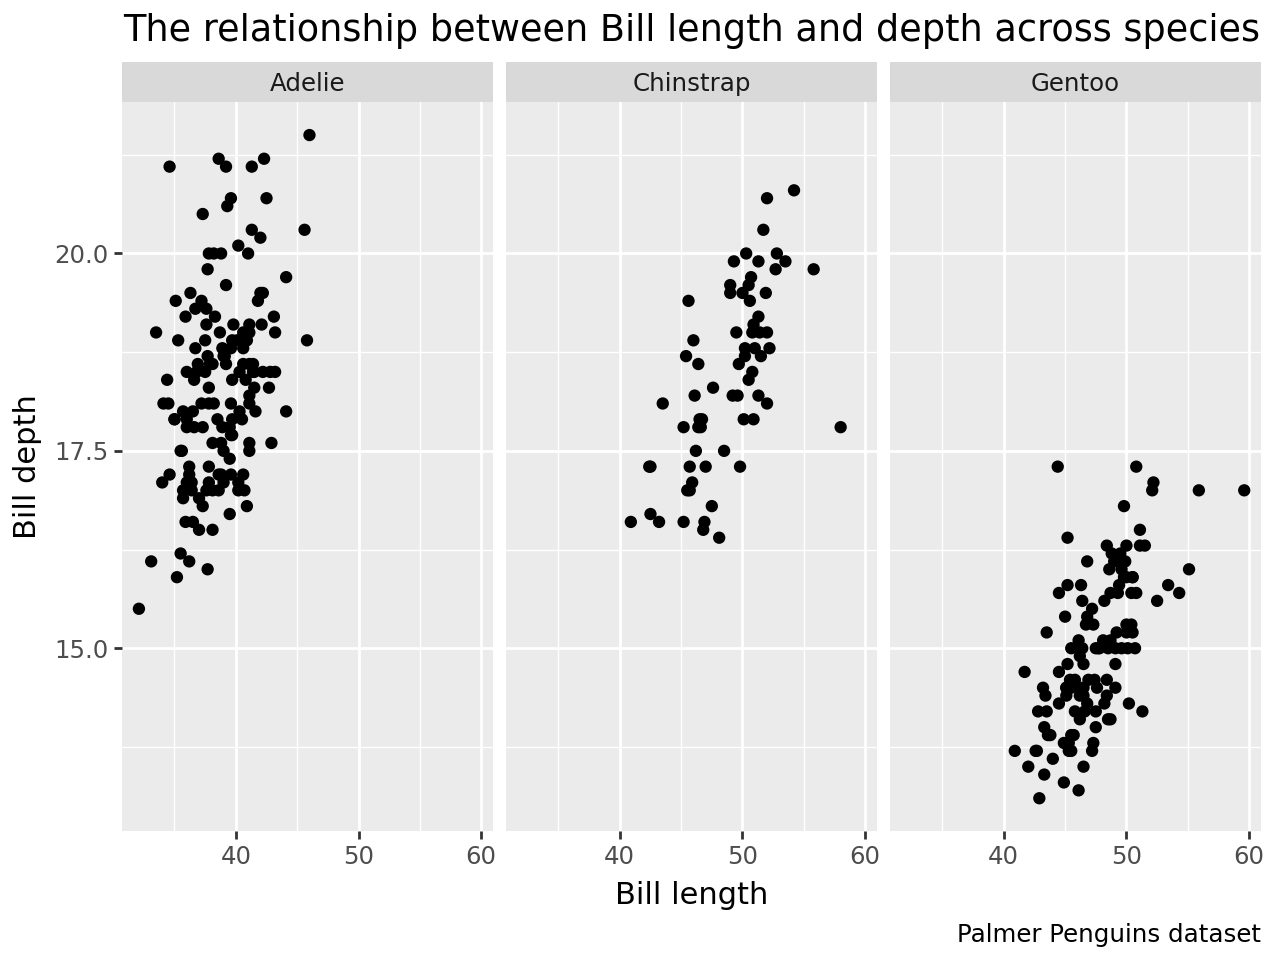

In [16]:
# Possible to add some customization with available functionalities in the Plotnine package
(
    ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_point()
    + facet_wrap("species")
    + labs(title = "The relationship between Bill length and depth across species", 
          x = "Bill length", 
          y = "Bill depth", 
          caption = "Palmer Penguins dataset")
)

## Altair (Vega-Altair)

Now we will switch to the use of main library through the rest of the python notebooks. We will be using a module in python called [Altair](https://altair-viz.github.io/index.html) which provides various functions to actually perform plots for us. There are lots of other modules in python that do similar things, all with various pros and cons. Altair is used here because it produces good looking and readable visualisations, but it is flexible and friendly API after spending some time. 

`Declarative visualization means that you need to think about data and relationships, instead incidental details`

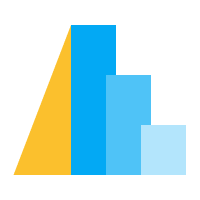

- There is lots of information on Altair on the web pages describing it https://altair-viz.github.io/index.html. 
- The 'getting started' pages are a good quick read to get a sense of how data visualisations are expressed in Altait https://altair-viz.github.io/getting_started/starting.html.
- These are a great source of reference and something we will come back to throughout discussing python data visualisations in the course. 

Another good place to start is to look at the gallery of example visualisations https://altair-viz.github.io/gallery/index.html. These provide lots of exemplars of the sorts of things that can be done using Altair. A very basic way to get started with producing a new visualisation is to find the closest gallery example to the thing you wish to produce and then cut and paste the example code used to make it as a starting point. There will be specific example on the Set 2, regarding the use of available charts to construct our case. 

Note: The example gallery often makes use of in-built data available within Altair itself (using vega_datasets). In the notebook below we won't use this inbuilt data as you will find other examples of visualiations using those online more frequently - so we will focus more on constructing visualisations from other open data sources so that you have extra examples.

### Simple visualisations with Altair

First let's look at visualising some data with lines, points, area, bar charts and bubbles. 

- The basic data model used by Altair is tabular data, similar to a spreadsheet or database table.
- When data is specified as a pandas DataFrame, Altair uses the data type information provided by pandas to automatically determine the data types required in the encoding

In [17]:
# First we do some module imports:
import pandas as pd
import altair as alt

We can use some data about US fish imports (value in US dollars) over recent years. This comes from open data from the US government:
https://www.ers.usda.gov/data-products/aquaculture-data.aspx

This has a combination of quantitative variables (import value in dollars each year), and qualitative variables (year, product).

In [18]:
fish = pd.read_excel('fishimportdata.xlsx')
fish.head()

,Product,2014,2015,2016,2017,2018
0,"Trout, fresh and frozen",95011.936,104791.429,120977.955,135236.725,164695.746
1,"Atlantic salmon, fresh",568901.674,658831.066,842603.917,948877.175,1035924.073
2,"Pacific salmon, fresh",111540.545,69978.873,80010.180,70733.165,90324.372
3,"Atlantic salmon, frozen",21457.836,16356.453,24230.787,22492.341,20197.169
4,"Pacific salmon, frozen",224334.704,238962.677,246204.469,302340.719,360673.107


## Altairing your data : )

Let's go through each of the given code snippets and explain what they do. 

As you can realize now, these snippets use the Altair library, which is a declarative statistical visualization library for Python. It allows you to create interactive and informative visualizations with minimal code. For the main steps that we need to remember, we can follow the below step-by-step guidance (it will be expanded in Set 2 examples);

# Components of Altair Data Visualization

1. **Import Libraries**
   - Import necessary libraries such as Altair and Pandas to handle data and create visualizations.

2. **Prepare Your Data**
   - Load and prepare your data using Pandas, ensuring it's in a suitable format for visualization.

3. **Create a Base Chart**
   - Use [`alt.Chart()`](https://altair-viz.github.io/user_guide/generated/toplevel/altair.Chart.html) to define a base chart with your DataFrame as the starting point.

4. **Choose a Mark Type**
   - Select the type of visualization (e.g., bar, line, scatter) using the appropriate [`mark_*`](https://altair-viz.github.io/user_guide/marks/index.html) method. Such as; `mark_line()`, `mark_point()`, etc.

5. **Encode Data**
   - Map data fields to visual properties like axes, colors, and sizes using the [`encode()`](https://altair-viz.github.io/user_guide/encodings/index.html#encoding-data-types) method.


### Lines, points, areas

Starting with a line, Altair asks us to specify the data for a 'Chart' (visualisation) that we make, and then what mark we use (in this case a line), and what we want to encode (for a line this needs an x and y axis).

Putting that all together as simply as we can it looks as follows:

In [20]:
# This code creates a line chart using the fish DataFrame. The mark_line() function specifies
# that the chart should be a line plot. The encode() method maps the 'Product' column to the
# x-axis and the '2014' column to the y-axis, plotting the 2014 values for each product.

alt.Chart(fish).mark_bar().encode(
    x='Product',
    y='2014')

alt.Chart(...)

In [21]:
alt.Chart(fish).mark_bar()

alt.Chart(...)

- You can see Altair provides all the parts that we want to use to make up our plot as functions that we can call using the . (dot) notation to specify a function within the module, or within the chart we set up.

Reflecting on the visualisation we produced, 

- Is the line here appropriate to encode this data? 
I would argue not, since it makes our x data look joined up when in fact it is categorical data (we could re-order the x-axis and it would make not difference to the sense of the data). So it would be better here to choose an encoding which did not join things up. Let's try looking at marking points for each category along the x-axis instead:

In [22]:
# This code creates a scatter plot with circular markers using the fish DataFrame. The mark_circle(size=80)
# function specifies that the markers should be circles with a size of 80. The x-axis represents 'Product',
# and the y-axis represents the values from 2014.
alt.Chart(fish).mark_circle(size=80).encode(
    x='Product',
    y='2014'
)

alt.Chart(...)

Note we have also introduced something new - we added an option to the mark function of our plot that marked on the circles for our data - size=80, this is an option to choose the size of the mark (circles in this case) used.  
Let's suppose we didn't like circles - we can change to a different type of 'point' marker, and show some more options while we are at it:

In [23]:
# This code generates a scatter plot with square markers using the fish DataFrame. The mark_point() function
# is used with additional parameters to set the shape to 'square' and the color to 'red'. The size of the
# markers is set to 80. The plot maps 'Product' to the x-axis and '2014' to the y-axis.
alt.Chart(fish).mark_point(size=80, shape='square', color='red').encode(
    x='Product',
    y='2014',
)

alt.Chart(...)

**Try followings and reflect on**

- Modify the `shape='square'` to another shape, such as 'circle' or 'triangle'. What happens? How does the visualization change? 
- Change `.mark_point()` to `.mark_bar()`. Does it work as expected? What adjustments are necessary to make a proper bar chart?
- Modify the code by adding `.encode(tooltip=['Product', '2014'])`. How does this improve the interaction with the visualization?

You can see the different styles of point markers and the options for them here [altair mark documentation](https://altair-viz.github.io/user_guide/marks.html). Above we also changed the colour of the marker - this is something can specify with a name of a colour (as we did - range of options available), or with a hex code for the colour of the form `color='#CA02D9'`. A good resource for picking colours and finding this hex format to specify them is [Adobe's color tool](https://color.adobe.com/create/color-wheel/) it's really helpful for picking matching colors too.

Here's an example of adding plots of two data sets on the same axes using different colours picked from that website.

In [27]:
# This snippet creates two separate scatter plots with triangle markers using the fish DataFrame, one for the
# year 2014 (a) and another for 2015 (b). The mark_point() function specifies the shape and color for each plot.
# The plots are then combined using the + operator, layering them on top of each other to compare the values
# for 2014 and 2015.
a = alt.Chart(fish).mark_point(size=80, shape='triangle', color='#CA02D9').encode(
    x='Product',
    y='2014',
)
b = alt.Chart(fish).mark_point(size=80, shape='triangle', color='#5FD902').encode(
    x='Product',
    y='2015',
)
# Combining these two figures together
a + b

alt.LayerChart(...)

Another example of multiple items added together to make a plot, this time done done a slightly different way by starting the 'Chart' and noting which data is to be used, but then adding the marks encoding the data in a separate line. 

In [25]:
# This code creates a layered chart using the fish DataFrame. It first encodes the 'Product' column to the x-axis
# and the '2014' column to the y-axis. Then, it layers different marks: a green line, red circles, and a rule.
# This combination provides a comprehensive view of the data for 2014.
plt = alt.Chart(fish).encode(
    x='Product',
    y='2014'
)

# Adds a green line connecting data points, illustrating trends or changes across 'Product' categories.
# Overlays red circles on each data point.
# By default, mark_rule() creates vertical or horizontal lines spanning the axis
plt.mark_line(color='green') + plt.mark_circle(size=100, color='red') + plt.mark_rule() 

alt.LayerChart(...)

Reflecting on the data viz; 
- Do you think we really need this linkage on the data points ? This last plot is not reasonable, and as we noted earlier linking up the data along the x axis doesn't make much sense for this data. 

On that topic, this data would clearly make a good bar chart, and that would be another obvious style of visualisation to use here and would emphasise that the x axis consists of categorical data. Here is some code to make a bar chart:

In [28]:
# This code creates a barchart. It first encodes the 'Product' column to the x-axis
# and the '2014' column to the y-axis. Then, it colours the bars with lightblue
alt.Chart(fish).mark_bar(color='lightblue').encode(
    x='Product',
    y='2014',
)

alt.Chart(...)

Here is a different way of putting two visualisations together, adding them side by side rather than on the same axes.

In [29]:
# This code creates two separate bar charts using the fish DataFrame. The first chart, 'left',
# is a bar chart that maps the 'Product' column to the x-axis and the '2014' column to the y-axis,
# with bars colored in light blue. The second chart, 'right', is similar but maps the '2017' column
# to the y-axis instead. The alt.hconcat(left, right) function horizontally concatenates these two
# charts, placing them side by side for easy comparison of product values between 2014 and 2017.
left = alt.Chart(fish).mark_bar(color='lightblue').encode(
    x='Product',
    y='2014',
)
right = alt.Chart(fish).mark_bar(color='lightblue').encode(
    x='Product',
    y='2017',
)
# It's also possible to stack the visualisations vertically rather than horizontally with alt.vconcat()
alt.hconcat(left, right)

alt.HConcatChart(...)

We add one more thing here too, when we specify the data for the x and y parts of the plot we add a colon and a letter (e.g. 'Product:N'). This is the way we can let Altair know what sort of data is contained in that column, there are five main data types:

| Data Type     | Shorthand Code | Description                          |
|---------------|--------------|--------------------------------------|
| **quantitative** | 'Q'          | A continuous real-valued quantity   |
| **ordinal**      | 'O'          | A discrete ordered quantity         |
| **nominal**      | 'N'          | A discrete unordered category       |
| **temporal**     | 'T'          | A time or date value                |
| **geojson**      | 'G'          | A geographic shape                  |


For the moment we will mostly be focussed on the first three of these types. (More details here [Altair docs](https://altair-viz.github.io/user_guide/encodings/index.html#encoding-data-types)).

For these last plots we will change the axes labels as well to be some text we choose rather than just the column names from the data.

In [30]:
# The first chart, 'top', is a bar chart that maps the 'Product' column to the x-axis and the '2014' column to the y-axis.
# The x-axis is labeled as 'Product imported', and the y-axis is labeled as 'Value imported to US in 2014 ($)'.
# The bars are colored in light blue.  
top = alt.Chart(fish).mark_bar(color='lightblue').encode(
    x=alt.X('Product:N', title='Product imported'),
    y=alt.Y('2014:Q', title='Value imported to US in 2014 ($)')
)
# The second chart, 'bot', is similar but maps the '2017' column
# to the y-axis, with the y-axis labeled as 'Value imported to US in 2017 ($)'.
bot = alt.Chart(fish).mark_bar(color='lightblue').encode(
    x=alt.X('Product:N', title='Product imported'),
    y=alt.Y('2017:Q', title='Value imported to US in 2017 ($)')
)

# The alt.vconcat(top, bot) function vertically concatenates these two charts, stacking them on top of each other for easy comparison
# of product values between 2014 and 2017.
alt.vconcat(top, bot)


alt.VConcatChart(...)

## Stacking up

Let's try and stack up even more of the data in one plot - there are two things going on in this data, 'Product' and 'year', when we combine everything on one plot we need to ask - which one is more important? 

- Look at the data The years are not collectively labelled, so not grouped in the spreadsheet (see the 'head' of the spreadsheet with the data in below), just each column labelled one by one '2014', '2015', etc. 
- So we need to group them to be able to refer to them collectively and start making plots using all of them - that needs a transformation of the data, and the one we want here Altair calls a 'fold', we want to fold the years into one item called 'Years'. 

**Here is how we do that.** 

Note we keep a collective item called 'Years' and 'Year' refers to the data within each of those columns separately. We will keep here the 'Product' as being the key grouping, so we primarily group the data together by 'Product' (column in the way this is structured below) and then plot the 'Years' as the x axis of each plot with each individual 'Year' data giving a value which is plotted on the y axis. We'll also choose to colour things by the 'Product' groupings. 

In [23]:
# The transform_fold() function is used to transform the data by folding the specified columns 
# ['2014', '2015', '2016', '2017', '2018'] into two new columns named 'Years' and 'Year'. 
# This transformation allows the data to be visualized
# in a long-form format suitable for faceted plots. 

# The mark_bar() function specifies that the chart should be a bar plot. 
# The encode() method maps 'Years' to the x-axis, 'Year' to the y-axis, and
# 'Product' to both the color and the column facets. 

# This results in a faceted bar chart where each
# column represents a different product, and each bar within those columns represents the value for
# a specific year, colored by product.
alt.Chart(fish).transform_fold(['2014', '2015', '2016', '2017', '2018'], as_=['Years', 'Year']).mark_bar().encode(
    x='Years:N',
    y='Year:Q',
    color='Product:N',
    #column='Product:N'
)

# For the relabelling the second label can be "value" 
# alt.Chart(fish).transform_fold(['2014', '2015', '2016', '2017', '2018'], as_=['Years', 'Value']).mark_bar().encode(
#    x='Years:N',
#    y='Value:Q',
#    color='Product:N',
#    column='Product:N'
# )

alt.Chart(...)

That's a lot of plots, so harder to see as a piece together (you probably have scroll bars to scroll around the visualisation). 

We could just have well have decided that actually the Years were the better grouping and have used 'Product' as the x axis. Here's how that would look (note the fold transformation is just the same as it is really just changing our view of the spreadsheet the same way to group the 'Years' together): 

In [31]:
# It folds the years 2014-2018 into 'Years' and 'Year' columns, creating a bar chart for each year. The x-axis represents 'Product',
# the y-axis represents 'Year' values, bars are colored by 'Years', and each facet represents a year.
alt.Chart(fish).transform_fold(['2014', '2015', '2016', '2017', '2018'], as_=['Years', 'Year']).mark_bar().encode(
    x='Product:N',
    y='Year:Q',
    color='Years:N',
    column='Years:N'
)

alt.Chart(...)

**Again, large because of all the data so you may need to scroll around to see the whole visualisation.** 

- This is the sort of exploration of different facets and ways of folding the data that it is really common to do in the exploration phase of looking at a data set. 
- These visualisations bring different things into proximity and help highlight different relationships in the data. During data exploration, when you get a new data set and try to make sense of it, this can be really helpful.

One last thing for these sorts of combined plots, what about just putting the columns right on top of each other? 

Note: `transform_fold()` component is serving to convert wide-form data to long-form data directly without any preprocessing (see Long-form vs. Wide-form Data for more information). Fold transforms are the opposite of the Pivot.

In [32]:

# Create a bar chart using the fish DataFrame, transforming the data for multiple years.
alt.Chart(fish).transform_fold(
    # Fold the specified years into two new columns: 'Years' and 'Year'.
    ['2014', '2015', '2016', '2017', '2018'], as_=['Years', 'Year']).mark_bar(
    # Set the opacity of the bars to 0.4 for a semi-transparent effect.
    opacity=0.3).encode(
    # Encode the x-axis with the 'Product' field as nominal data.
    alt.X('Product:N'),
    # Encode the y-axis with the 'Year' field as quantitative data, with no stacking.
    alt.Y('Year:Q', stack=None),
    # Encode the color of the bars based on the 'Years' field as nominal data.
    color='Years:N'
)


alt.Chart(...)

In [33]:
# Create a bar chart using the fish DataFrame, transforming the data for multiple years.
alt.Chart(fish).transform_fold(
    # Fold the specified years into two new columns: 'Years' and 'Year'.
    ['2014', '2015', '2016', '2017', '2018'], as_=['Years', 'Year']).mark_bar().encode(
    # Encode the x-axis with the 'Product' field as nominal data.
    alt.X('Product:N'),
    # Encode the y-axis with the 'Year' field as quantitative data, with stacking enabled.
    alt.Y('Year:Q', stack=True),
    # Encode the color of the bars based on the 'Years' field as nominal data.
    color='Years:N'
)

alt.Chart(...)

- Here you can see we have tried this two different ways. 
- First by overlaying the bars always starting at the same place, but making them slightly transluscent. 
- Second by stacking each bar on top of the ones that came before. 

Both of these sorts of plots have their uses - but for me neither is very satisfying, they both make it pretty hard to compare things that we might like to compare. What else we can do for an easy comparison with the functions from Altair do you think ? Feel free to explore bar chart related examples from here: https://altair-viz.github.io/gallery/index.html

# Open-ended Exercises 

Here are some exercises for you to have a go with for your self-learning. There will be no direct solution key for this so feel free to explore, get errors to fix and create some different data viz examples to discuss with your group members and with us. 
When you get some improved examples compared to given below, regarding the data viz design, they are good candidates to consider for your portfolio collection.

`"The one who asks questions doesn't lose his way" (proverb).`

1) Try out a visualisation of the different products in the year 2017 using a bar chart. 
- How would you get started? 
- Can you change the colour and the text (title) used to label each axis?

2) Read in the dataset `'anscombe.xlsx'` which contains the various data used to construct Anscombe's quartet that was mentioned in the lecture (see [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) also). 

Try making some visualisations of this data using the pairs of x,y coordinates you can find across the columns of the excel file. Can you make them as separate scatter plots, put them side by side, or above each other, and finally style them appropriately (choosing colour, symbol, and titling the axes).

3) From the UK dataset [here](https://data.gov.uk/dataset/34758844-5e83-450a-81c9-7a0e2ca0d6b1/uk-wood-production-and-trade-2017-provisional-figures) we can get information about UK wood imports. This is pre-processed into a simpler form in the spreadsheet `'UK_wood_imports.xlsx'`. Using the ideas you have seen above make some visualisations of this dataset (note the numbers are in thousands of cubic metres). 